In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Instantiate Dataframes

In [128]:
file = "data/Nigeria Electricity Data.xlsx"

df_2021 = pd.read_excel(file, sheet_name="2021 MIS").set_index("State").drop(columns=["Country", "Survey"])
df_2018 = pd.read_excel(file, sheet_name="2018 DHS").set_index("State").drop(columns=["Country", "Survey"])
df_2015 = pd.read_excel(file, sheet_name="2015 MIS").set_index("State").drop(columns=["Country", "Survey"])
df_2013 = pd.read_excel(file, sheet_name="2013 DHS").set_index("State").drop(columns=["Country", "Survey"])

Concatenate to create multi-level index

In [129]:

combined_df = pd.concat([df_2021, df_2018, df_2015, df_2013], keys=['2021', '2018', '2015', '2013'], names=['Year', 'State'])

combined_df

Households with electricity  \
Year State                                                    
2021 Federal Capital Territory                         76.1   
     Benue                                             41.5   
     Kogi                                              59.3   
     Kwara                                             91.1   
     Nasarawa                                          28.2   
...                                                     ...   
2013 Bayelsa                                           52.5   
     Cross River                                       57.4   
     Delta                                             78.3   
     Edo                                               82.4   
     Rivers                                            65.1   

                                Population with electricity  
Year State                                                   
2021 Federal Capital Territory                         67.7  
     Benue                                             42.2  
     Kogi                                              58.5  
     Kwara                                             90.7  
     Nasarawa                                          27.0  
...                                                     ...  
2013 Bayelsa                                           49.4  
     Cross River                                       57.3  
     Delta                                             79.1  
     Edo                                               82.2  
     Rivers                                            67.9  

[148 rows x 2 columns]

In [130]:
pop_2021 = df_2021.drop(columns="Households with electricity")
pop_2018 = df_2018.drop(columns="Households with electricity")
pop_2015 = df_2015.drop(columns="Households with electricity")
pop_2013 = df_2013.drop(columns="Households with electricity")

In [131]:
pop_df = pd.merge(pop_2013, pop_2015, on='State', suffixes=(' (2013)', ' (2015)'))
pop_df = pd.merge(pop_df, pop_2018, on='State')
pop_df = pd.merge(pop_df, pop_2021, on='State', suffixes=(' (2018)', ' (2021)'))
pop_df.columns = ["2013", "2015", "2018", "2021"]
pop_df

,2013,2015,2018,2021
State,,,,
Federal Capital Territory,71.4,69.6,77.3,67.7
Benue,20.1,22.9,41.3,42.2
Kogi,64.1,67.1,58.7,58.5
Kwara,90.1,51.0,75.9,90.7
Nasarawa,26.7,20.3,59.3,27.0
Niger,51.8,37.4,52.2,21.9
Plateau,28.8,17.1,41.1,17.0
Adamawa,39.7,14.4,42.7,36.1
Bauchi,32.7,39.2,36.4,13.7


<AxesSubplot:ylabel='State'>

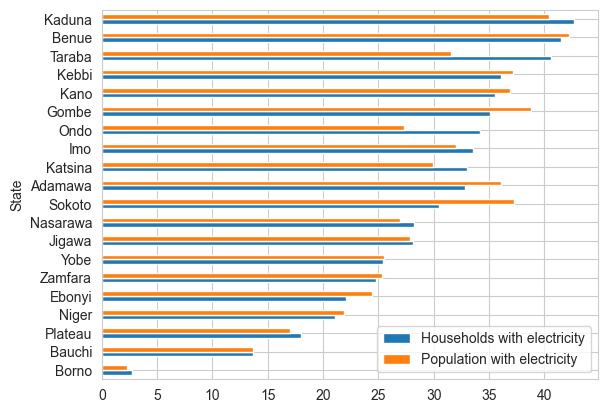

In [132]:
df_2021.sort_values("Households with electricity").head(20).plot(kind="barh")

Check for difference in distribution of both columns.

- Null Hypothesis: There is **no** significant difference between Households with Electricity and Population with Electricity

- Alternate Hypothesis: There is significant difference between Households with Electricity and Population with Electricity

In [133]:
from scipy.stats import ttest_rel


def test_household_vs_population(data, alpha=0.05):

    # Perform the paired t-test
    t_stat, p_value = ttest_rel(data['Households with electricity'], data['Population with electricity'])

    # Print the results
    print(f"Paired t-test results:")
    print("t-statistic: {:.2f}".format(t_stat))
    print("p-value: {:.2f}".format(p_value))
    
    # compare the p-value to the significance level
    if p_value < alpha:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")

In [134]:
test_household_vs_population(df_2013)

Paired t-test results:
t-statistic: 0.49
p-value: 0.62
Fail to reject the null hypothesis


Since the test failed to reject the null hypothesis for each dataframe, we can proceed with either `Households with electricity` or `Population with electricity`.

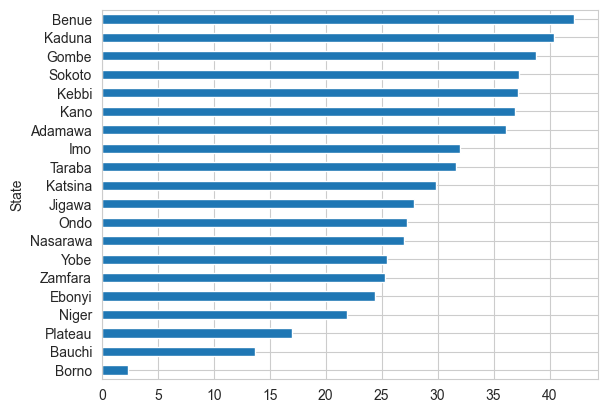

In [135]:
key = "Population with electricity"
data = df_2021

data.sort_values(key)[key].head(20).plot(kind="barh");

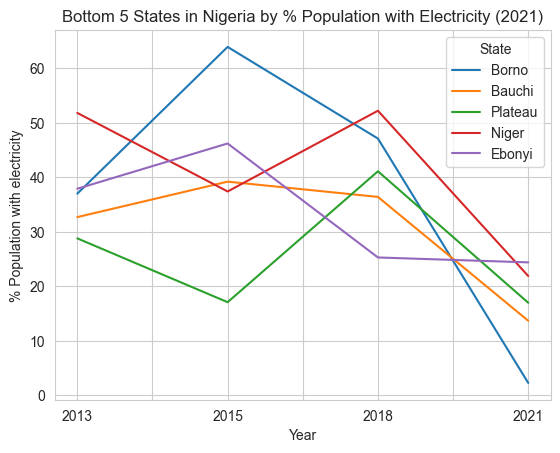

In [136]:
sns.set_style("whitegrid")

num = 5
bottom_states_2021 = pop_df.sort_values("2021").head(num)
# bottom_20_states.plot(y=["2013", "2015", "2018", "2021"])
bottom_states_2021.T.plot(
    xlabel="Year", ylabel="% Population with electricity", title=f"Bottom {num} States in Nigeria by % Population with Electricity (2021)"
    );
